<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('churn_data.xlsx')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [5]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df = df.dropna()

In [7]:
cat_vars = ['PhoneService',"Contract","PaperlessBilling","PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]
modeling_vars = cat_vars + num_vars

In [8]:
X = df.filter(modeling_vars).copy()
y = df['Churn'].copy()
y = pd.DataFrame(y)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

In [10]:
X = pd.get_dummies(X)

In [11]:
X.head()

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,0,1,0,0,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
lr.predict(X_test)

array([0, 0, 1, ..., 0, 1, 1])

In [15]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
987,1,19.75,19.75,0,1,1,0,0,1,0,1,0,0,0,0,0
6929,25,20.05,471.70,0,1,1,0,0,1,0,0,1,0,0,0,0
5495,11,73.85,926.25,0,1,1,0,0,0,1,0,0,1,0,1,1
511,61,106.45,6300.15,0,1,1,0,0,0,1,0,0,1,0,0,0
6342,47,104.10,5135.15,0,1,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,58,19.85,1158.85,0,1,0,0,1,0,1,0,0,0,1,0,0
3593,8,70.10,551.35,0,1,1,0,0,0,1,0,0,0,1,1,0
6729,68,72.95,4953.25,0,1,0,0,1,0,1,1,0,0,0,0,0
2032,15,88.15,1390.60,0,1,1,0,0,1,0,0,0,1,0,1,1


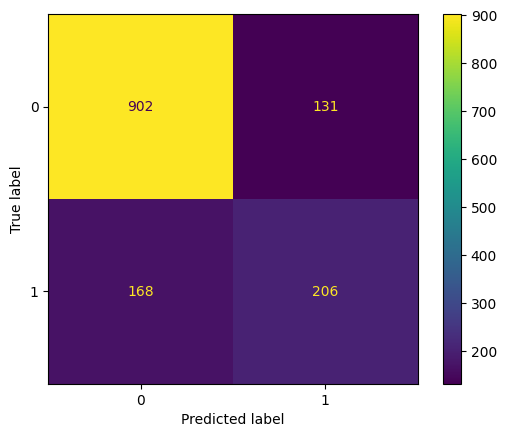

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lr_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [21]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.798719772403983
Acurácia (Teste): 0.7874911158493249
Acurácia Balanceada (Treino): 0.7146401462532329
Acurácia Balanceada (Teste): 0.7119935186958705
Precision (Treino): 0.6467259498787389
Precision (Teste): 0.6112759643916914
Recall (Treino): 0.5351170568561873
Recall (Teste): 0.5508021390374331
F1-Score (Treino): 0.5856515373352855
F1-Score (Teste): 0.5794655414908579
ROCAUC (Treino): 0.8409948881028309
ROCAUC (Teste): 0.8284175678543881


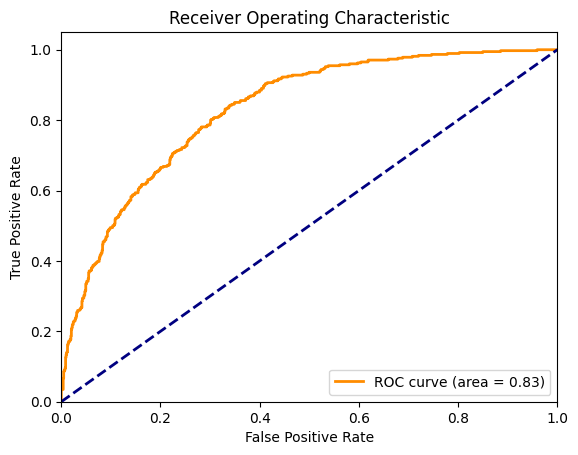

In [26]:
from sklearn.metrics import roc_curve, auc

# Predições probabilísticas
y_scores = lr.predict_proba(X_test)[:, 1]

# Calcula ROC
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [27]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.798720,0.714640,0.646726,0.535117,0.585652,0.840995
1,Logistic Regression,teste,0.787491,0.711994,0.611276,0.550802,0.579466,0.828418
